In [1]:
import pandas as pd

rent_data = pd.read_csv("./Datasets/train.csv")
coe_data = pd.read_csv("./Datasets/auxiliary-data/sg-coe-prices.csv")

In [2]:
# Convert month names in coe_data to month numbers for easier merging
month_map = {
    "january": 1, "february": 2, "march": 3, "april": 4, "may": 5, "june": 6,
    "july": 7, "august": 8, "september": 9, "october": 10, "november": 11, "december": 12
}
coe_data["month_num"] = coe_data["month"].map(month_map)

# Calculate average COE prices per month
avg_coe_prices = coe_data.groupby(["year", "month_num"])["price"].mean().reset_index()

# Extract year and month from rent_approval_date in rent_data
rent_data["year"] = pd.to_datetime(rent_data["rent_approval_date"]).dt.year
rent_data["month_num"] = pd.to_datetime(rent_data["rent_approval_date"]).dt.month

# Calculate average rent prices per month
avg_rent_prices = rent_data.groupby(["year", "month_num"])["monthly_rent"].mean().reset_index()

# Merge the two datasets on year and month
merged_data = pd.merge(avg_coe_prices, avg_rent_prices, on=["year", "month_num"], how="inner")

merged_data.head()

,year,month_num,price,monthly_rent
0,2021,1,45187.375,2152.142513
1,2021,2,44871.000,2146.756152
2,2021,3,43812.000,2167.458384
3,2021,4,50396.750,2182.674772
4,2021,5,52199.625,2216.537301


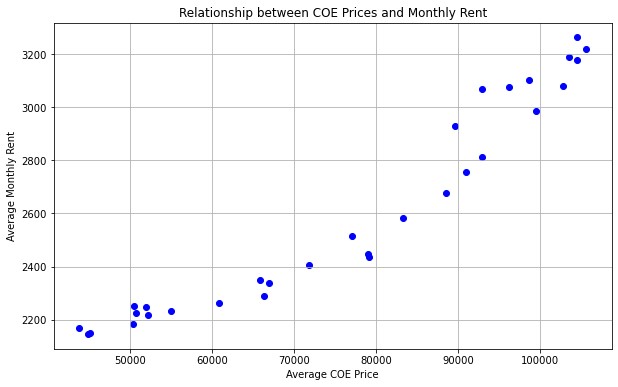

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of COE prices vs. Monthly rent
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["price"], merged_data["monthly_rent"], color='blue')
plt.title("Relationship between COE Prices and Monthly Rent")
plt.xlabel("Average COE Price")
plt.ylabel("Average Monthly Rent")
plt.grid(True)
plt.show()

(0.9570336518101654, 3.9204049036126734e-17)

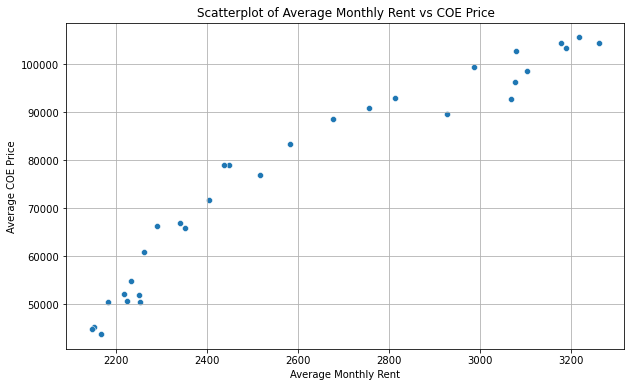

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='monthly_rent', y='price')
plt.title('Scatterplot of Average Monthly Rent vs COE Price')
plt.xlabel('Average Monthly Rent')
plt.ylabel('Average COE Price')
plt.grid(True)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_data['monthly_rent'], merged_data['price'])

correlation_coefficient, p_value

In [10]:
coe_path = './Datasets/train.csv'
coe_df = pd.read_csv(coe_path)

# coe_df['rent_approval_date'] = pd.to_datetime(coe_df['rent_approval_date'])
# coe_df['year_month'] = coe_df['rent_approval_date'].dt.to_period('M')

coe_df["year"] = pd.to_datetime(coe_df["rent_approval_date"]).dt.year
coe_df["month_num"] = pd.to_datetime(coe_df["rent_approval_date"]).dt.month
coe_df = coe_df.merge(merged_data, on=["year", "month_num"], how='left')

coe_df = coe_df.rename(columns={'price': 'coe'})
coe_df = coe_df[['coe']]
coe_df.to_csv('./Datasets/coe_train.csv', index=False)